In [1]:
%pylab inline
import numpy as np
import matplotlib
import math

Populating the interactive namespace from numpy and matplotlib


# Vector Geometry

## Week 1 (Vectors)

**Topics:** Vector between two points, vector equation of a line, vector equation to slope-intercept form ($y=mx+b$), slope-intercept form to vector equation. 

### Vector between two points

Suppose we have a point $\vec{a} = \begin{pmatrix}a_1\\a_2\end{pmatrix}$ and a point $\vec{b} = \begin{pmatrix}b_1\\b_2\end{pmatrix}$, we can obtain a vector $\vec{AB}$ by subtracting $\vec{b}-\vec{a} = \begin{pmatrix}b_1-a_1\\b_2-a_2\end{pmatrix}$.

### Vector equation of a line

We can write a line as a vector equation in the form of $\vec{x}=\begin{pmatrix}s_1\\s_2\end{pmatrix}+\lambda\begin{pmatrix}m_1\\m_2\end{pmatrix}$. Where $s$ indicates the support vector, and $m$ the direction vector.

### Slope-intercept form to vector equation

Suppose we have an equation of line $x+4y=6$, and we want to write it as a vector equation, we can do this in three ways:

#### Method 1

We can write it as a system of linear equations and let $y=\lambda$. Then it's easy to write it as a vector equation:

$$ x+4y=6 \iff x=6-4y \iff \begin{cases}x=6-4\lambda\\y=\lambda\end{cases} \iff \begin{pmatrix}x\\y\end{pmatrix} = \begin{pmatrix}6\\0\end{pmatrix}+\lambda\begin{pmatrix}-4\\1\end{pmatrix}$$

#### Method 2

We can write it in slope-intercept from to get the slope, and find a point on the line:

From $x+4y=6$ it follows that $y=-\frac{1}{4}x+\frac{3}{2}$. The direction vector is $\begin{pmatrix}1\\-\dfrac{1}{4}\end{pmatrix}$ multiply by $-1$ to get $\begin{pmatrix}-4\\1\end{pmatrix}$. If we have $y=0$ then $x=6$. This gives:

$$\begin{pmatrix}x\\y\end{pmatrix} = \begin{pmatrix}6\\0\end{pmatrix} + \lambda\begin{pmatrix}-4\\1\end{pmatrix}$$

#### Method 3

When we have two points on the line $A(6,0)$ and $B(2,1)$ the direction vector is $\vec{AB}=\vec{b}-\vec{a}$ and a point on the line is $A$, which gives:

$$\begin{pmatrix}x\\y\end{pmatrix} = \begin{pmatrix}6\\0\end{pmatrix} + \lambda\begin{pmatrix}-4\\1\end{pmatrix}$$

### Vector equation to slope-intercept form

Suppose we have a vector equation $\begin{pmatrix}x\\y\end{pmatrix}=\begin{pmatrix}1\\2\end{pmatrix}+\lambda\begin{pmatrix}-3\\2\end{pmatrix}$, and we want to rewrite it in slope-intercept form $y=mx+b$, we can do this in two ways:

#### Method 1

Write it as a system of linear equations, and eliminate $\lambda$:

$$\begin{pmatrix}x\\y\end{pmatrix}=\begin{pmatrix}1\\2\end{pmatrix}+\lambda\begin{pmatrix}-3\\2\end{pmatrix} \iff \begin{cases}x=1-3\lambda\\y=2+2\lambda\end{cases} \iff \begin{cases}2x=2-6\lambda\\3y=6+6\lambda\end{cases} \iff 2x+3y=8\iff y=\frac{8}{3}-\frac{2}{3}x$$

#### Method 2

Determine the slope and write it in point-slope form:

With the direction vector $\begin{pmatrix}-3\\2\end{pmatrix}$ we can determine that the slope is $-\frac{2}{3}$. A point on the line is the support vector $\begin{pmatrix}1\\2\end{pmatrix}$. Using point-slope form:

$$(y-y_1)=m(x-x_1) \implies (y-2)=-\frac{2}{3}(x-1) \iff y=\frac{8}{3}-\frac{2}{3}x$$

## Week 2 (Lines)

**Topics:** Parallel lines, parallel line equation, intersection of two lines.

### Parallel lines

Two lines are parellel to each other if the direction vector is the same. The lines are coinciding when the direction and support vectors are the same.

#### Parallel and coinciding

Two lines are parallel and coinciding when $\dfrac{a}{c}=\dfrac{b}{d}=\dfrac{p}{q}$, for example: $\begin{cases}x+3y=5\\2x+6y=10\end{cases}$.

#### Parallel and not coinciding

Two lines are parallel and not coinciding when $\dfrac{a}{c}=\dfrac{b}{d}\not=\dfrac{p}{q}$, for example: $\begin{cases}x+3y=5\\2x+6y=12\end{cases}$.

### Intersection of two lines

**General case**

If we have two lines in standard form:

$$\begin{cases}a_1x+b_1y=c_1\\a_2x+b_2y=c_2\end{cases} \iff \begin{pmatrix}a_1&b_1&c_1\\a_2&b_2&c_2\end{pmatrix} \iff \begin{pmatrix}\dfrac{a_1}{a_1}&\dfrac{b_1}{a_1}&\dfrac{c_1}{a_1}\\a_2-a_2&b_2-\dfrac{a_2b_1}{a_2}&c_2-\dfrac{a_2c_1}{a_1}\end{pmatrix}\iff \begin{pmatrix}1&\dfrac{b_1}{a_1}&\dfrac{c_1}{a_1}\\0&b_2-\dfrac{a_2b_1}{a_2}&c_2-\dfrac{a_2c_1}{a_1}\end{pmatrix}$$

Now we can solve for $y$, which is:

$$y = \dfrac{c_2 - \dfrac{a_2c_1}{a_1}}{b_2-\dfrac{a_2b_1}{a_1}} \iff y = \dfrac{a_1c_2-a_2c_1}{a_1b_2-a_2b_1}$$

To find $x$, we substitute $y$ into:

$$a_1x+b_1y=c_1 \implies x + b_1y = c_1 \iff x = c_1-b_1y$$

We now have a general formula to find the intersection (if it exists) of any two given lines in standard form by solving $y=\dfrac{a_1c_2-a_2c_1}{a_1b_2-a_2b_1}$ and $x=c_1-b_1y$.

**Code**

In [2]:
""" 
Finds the intersection between two lines in standard form (ax+by=c)

Input are two tuples in the form of (a,b,c)
Output is a point (x,y) where there is an intersection
Throws an exception if the determinant is equal to zero
"""
def intersection(l,m):
    # Unpacking
    a1,b1,c1 = (l[0],l[1],l[2])
    a2,b2,c2 = (m[0],m[1],m[2])
    
    # Check if the determinant is non-zero so there actually is a solution.
    if a1 * b2 - a2 * b1 == 0:
        raise ValueError("Determinant is zero, no solution.")
        
    # Solve for y by a pivot on x1
    y = (a1 * c2 - a2 * c1) / (a1 * b2 - a2 * b1)
    
    # Solve for x with back-substitution
    x = c1 - b1 * y
    return (x,y)

Now we can easily solve for $l : x+6y=2$ and $m : x+11y=9$.

In [3]:
(x,y) = intersection((1,6,2), (1,11,9))
x,y

(-6.399999999999999, 1.4)

Which we can verify:

In [4]:
(x + 6*y - 2) == (x + 11*y - 9)

True

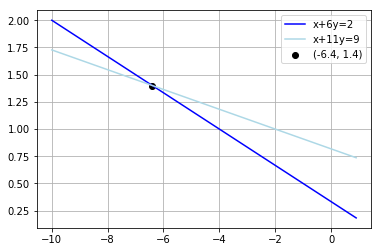

In [5]:
points = np.arange(-10,1,0.1)
plot(points, [(2-x)/6 for x in points], c='b')
plot(points, [(9-x)/11 for x in points], c='lightblue')
scatter(x,y, c='black')
grid()
legend(['x+6y=2','x+11y=9','(-6.4, 1.4)']);

When there is no solution the method will raise an exception.

In [6]:
try:
    intersection((2,2,6), (1,1,9))
except ValueError as e:
    print(e)

Determinant is zero, no solution.


## Week 3 (Length, angle, inner product)

**Topics:** Length of a vector, distance between two points, angle between two vectors, inner product (dot product), standard form of a line, standard form of a line through a point, vector equation to standard form and reversed.

### Length of a vector

For any vector $\vec{u}$ we can calculate the length with pythagorean theorem:

$$\vec{u}_{length} = \sqrt{u_1^2+u_2^2}$$

**Code**

In [7]:
def length(u):
    return math.sqrt(u[0]**2 + u[1]**2)

If we try this for the pythagorean triplet $3^2 + 4^2 = 5^2$:

In [8]:
length((3,4))

5.0

### Distance between two points

For two points $A$ and $B$, we can determine the distance which is the length of $\vec{AB}$:

$$d(A,B)=\sqrt{\left(b_1-a_1\right)^2+\left(b_2-a_2\right)^2}$$

**Code**

In [9]:
def distance(a,b):
    return math.sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)

In [10]:
distance((4,0),(0,3))

5.0

### Inner product (dot product)

For two vectors $\vec{u}$ and $\vec{v}$ the inner product (dot product) is defined as:

$$ \vec{u} \cdot \vec{v} = u_1v_1+u_2v_2 $$

When two vectors are perpendicular to each other the angle $\phi$ is $90^\circ$ and the inner product is $0$.

$$ \vec{u} \cdot \vec{v} = 0 \iff \phi = 90^\circ \iff \vec{u} \perp \vec{v} ,\qquad  \vec{u}, \vec{v} \not= \vec{0}$$

**Code**

In [11]:
def dot(u,v):
    return u[0]*v[0]+u[1]*v[1]

In [12]:
dot((5,5),(5,-5))

0

### Angle between two vectors

For two vectors $\vec{u}$ and $\vec{v}$ we can calculate the angle $\phi$:

$$ \phi = \cos^{-1}\left(\frac{\vec{u}\cdot\vec{v}}{\left|\left|\vec{u}\right|\right|\cdot\left|\left|\vec{v}\right|\right|} \right)$$

**Graph of $\cos^{-1}$**

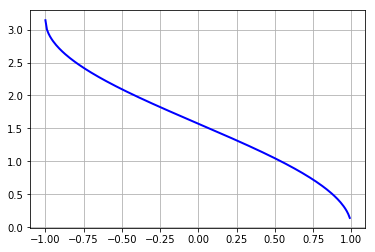

In [13]:
points = np.arange(-1,1.0,0.01)
plot(points, [math.acos(x) for x in points], c='b', lw=2);
grid()

**Code**

In [14]:
def angle(u,v):
    return math.acos(dot(u,v) / (length(u) * length(v)))

In [15]:
angle((5,5),(5,-5)) * (180 / math.pi) # Python uses radians by default, the output is in degrees.

90.0

### Standard form of a line

The standard form of a line is $ax+by=c$. This notation allows us to use vertical lines.

### Standard form of a line through a point

If we have the normal of a line and we know a point $P$, we can get a standard equation for the line through point $P$ with:

$$ \vec{n}\cdot\vec{x} = \vec{n}\cdot\vec{p}$$

### Vector equation to standard form and back

## Week 4 (Geometry)

**Topics:** Angle between two lines, distance from a point to a line, two parallel lines, orthocenter, centroid, circumcenter.

### Angle between two lines

### Distance from a point to a line

### Two parallel lines

### Orthocenter

### Centroid

### Circumcenter